In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# FINAL PROJECT DATA SCIENCE

# Business/Project Understanding

HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam. HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, pada final project kali ini akan mencari atau mengkategorikan negara-negara yang menjadi fokus CEO.

---



---

# DATASET UNDERSTANDING

In [2]:
# Baca File
df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Data terdiri dari 167 baris (rows) dengan 10 kolom

---



---

# EDA PART 1

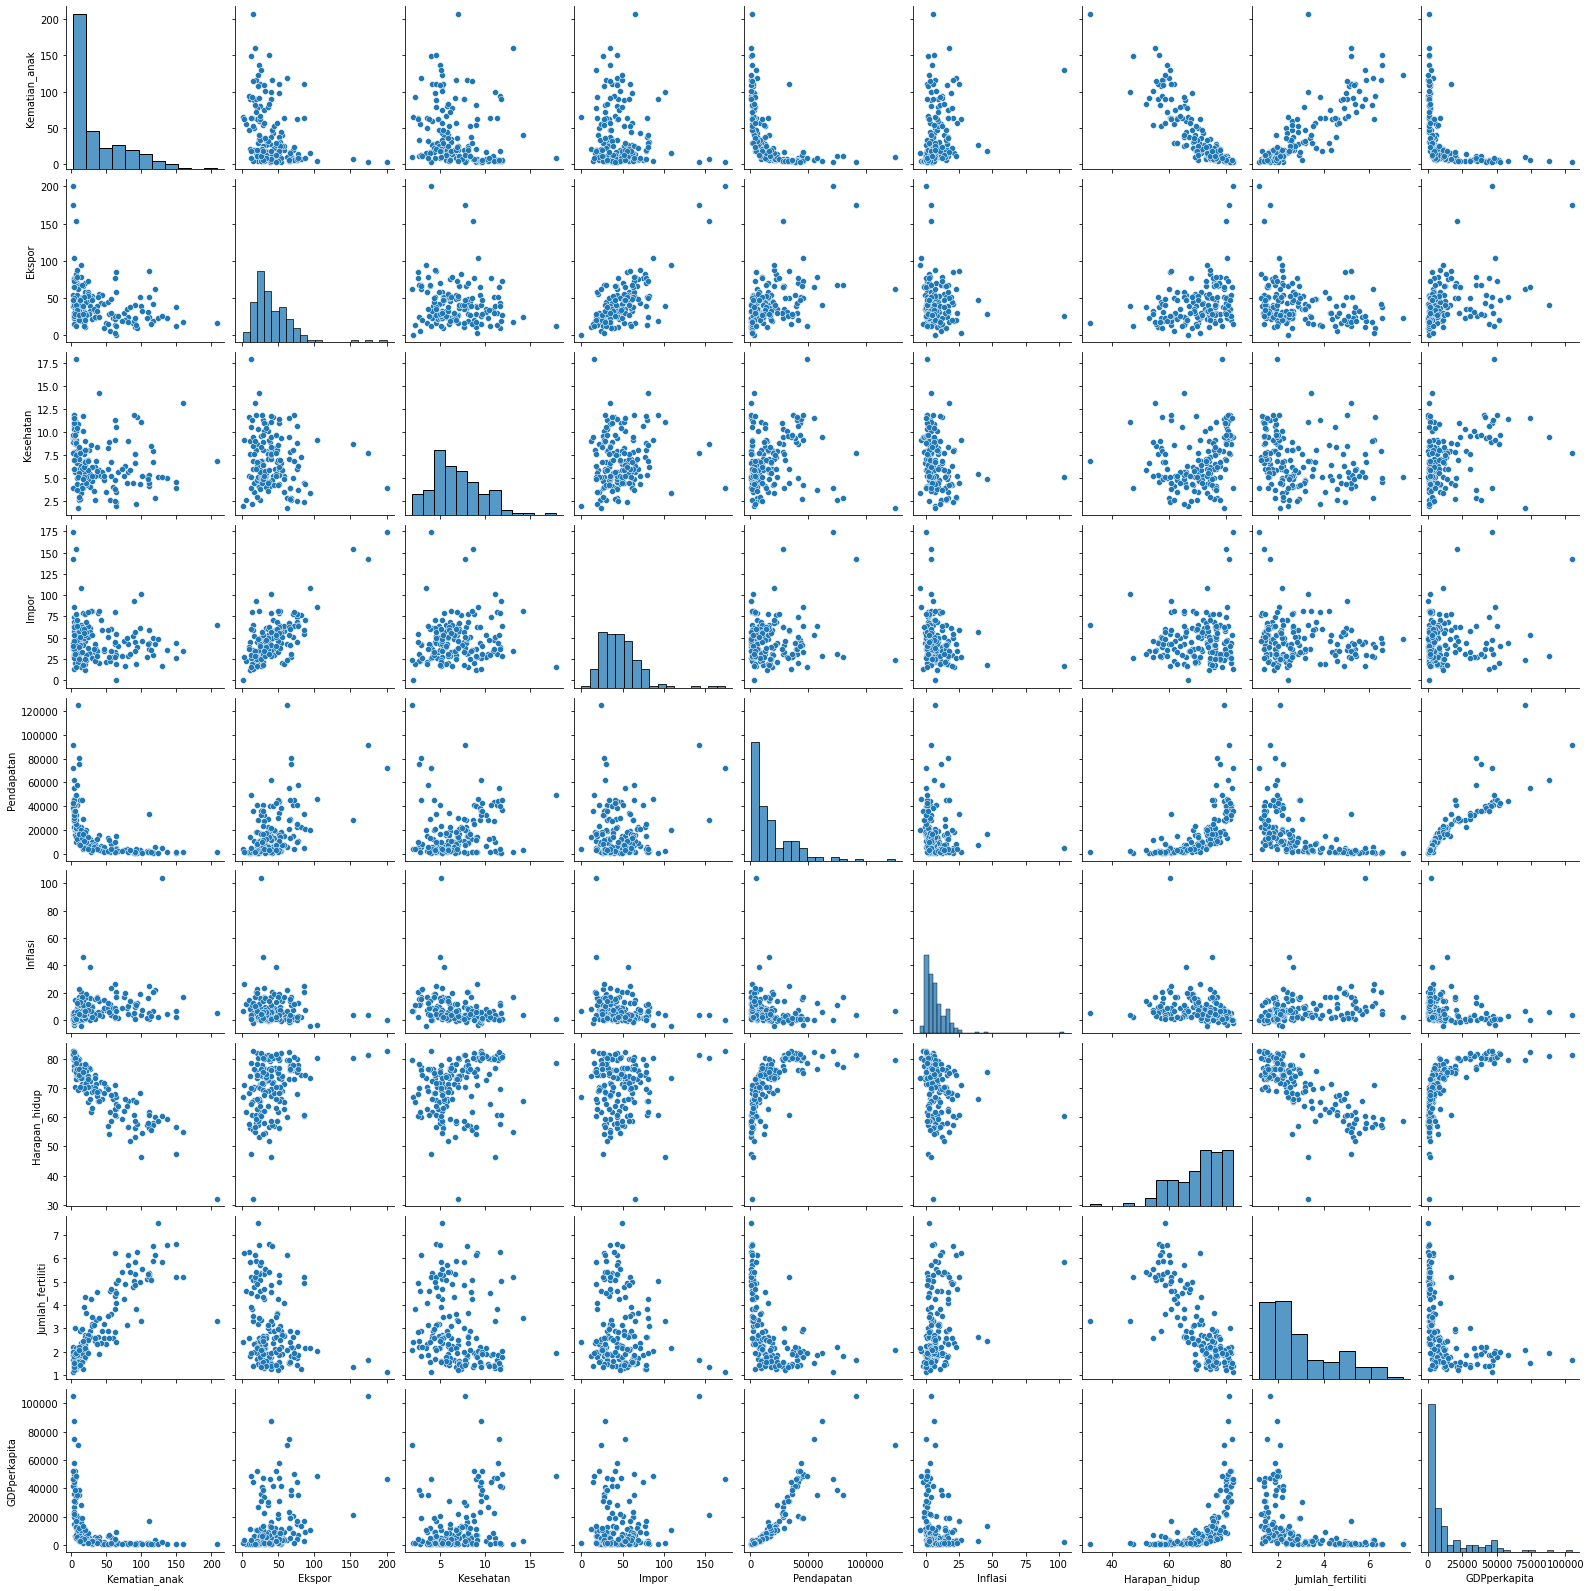

In [3]:
# Multivariate Analysis (Pair plot)
sns.pairplot(data=df, diag_kind='hist')
plt.show()

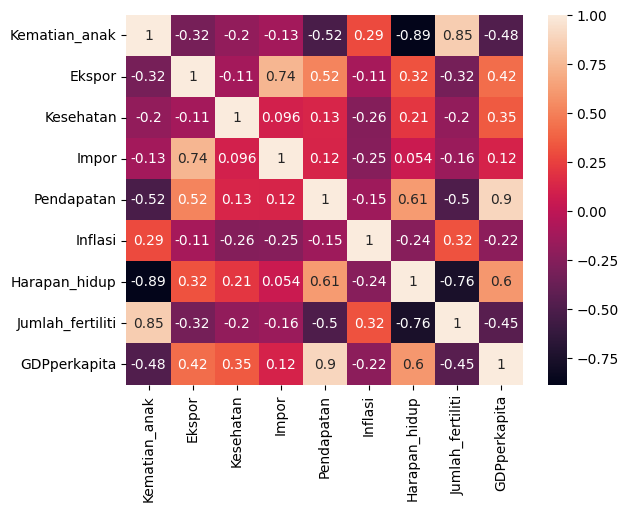

In [4]:
# Multivariate Analysis (Heat Map)
sns.heatmap(df.corr(), annot=True, fmt='.2g')
plt.show()

---



---

# FEATURE SELECTION

Dari Heat Map dan Pair Plot sebelumnya maka akan digunakan hubungan antara GDP perkapita dengan Pendapatan karena korelasi hubungan tersebut tergolong sangat kuat (Strong Positive Correlation). Hubungan antar kedua variabel tersebut dapat diartikan dengan semakin tinggi Pendapatan maka semakin tinggi GDP perkapita. Dalam meneyelesaikan final project ini diminta untuk mendapatkan negara yang membutuhkan bantuan, maka penyelesaiannya adalah dengan mendapatkan negara dengan Pendapatan terendah dengan GDP perkapita terendah.

---



---

# DATA CLEANING

# 1. MISSING VALUE

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

Dengan menggunakan atribut info() dan atribut isnull() dapat ditarik kesimpulan bahwa semua kolom tidak mempunyai missing value. Hal ini disebabkan karena deteksi nilai hilang (missing value) dengan menggunakan atribut isnull() memperoleh hasil 0 untuk semua kolom.

# 2. OUTLIERS

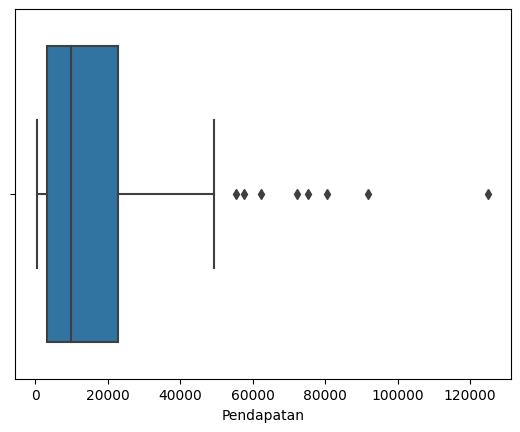

In [7]:
# Cek Pendapatan
sns.boxplot(x='Pendapatan', data=df)
plt.show()

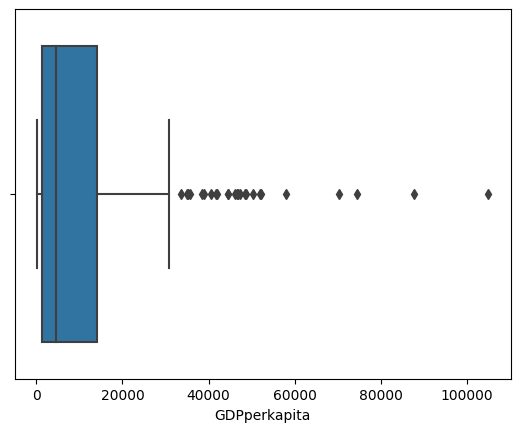

In [8]:
# Cek GDP perkapita
sns.boxplot(x='GDPperkapita', data=df)
plt.show()

In [9]:
# Fungsi untuk mencari outliers (uji lower bound & upper bound)
def cari_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_fix = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_fix

In [10]:
print(cari_outlier(df['Pendapatan']))
print(cari_outlier(df['GDPperkapita']))

23      80600
82      75200
91      91700
114     62300
123    125000
133     72100
145     55500
157     57600
Name: Pendapatan, dtype: int64
7       51900
8       46900
15      44400
23      35300
29      47400
44      58000
53      46200
54      40600
58      41800
68      41900
73      48700
75      35800
77      44500
82      38500
91     105000
110     50300
111     33700
114     87800
123     70300
133     46600
144     52100
145     74600
157     35000
158     38900
159     48400
Name: GDPperkapita, dtype: int64


In [11]:
# Fungsi untuk menghapus outliers
def hapus_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_fix = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
  return df_fix

Hapus Outlier #1

In [12]:

df2 = hapus_outlier(df[['Pendapatan', 'GDPperkapita']])

df2.dropna(axis=0, inplace=True)
df2

,Pendapatan,GDPperkapita
0,1610.0,553.0
1,9930.0,4090.0
2,12900.0,4460.0
3,5900.0,3530.0
4,19100.0,12200.0
...,...,...
162,2950.0,2970.0
163,16500.0,13500.0
164,4490.0,1310.0
165,4480.0,1310.0


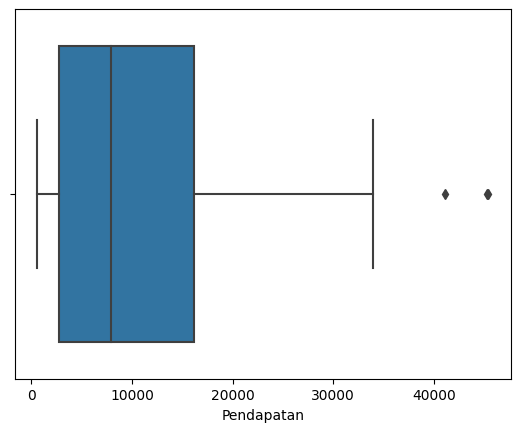

In [13]:
sns.boxplot(x='Pendapatan', data=df2)
plt.show()

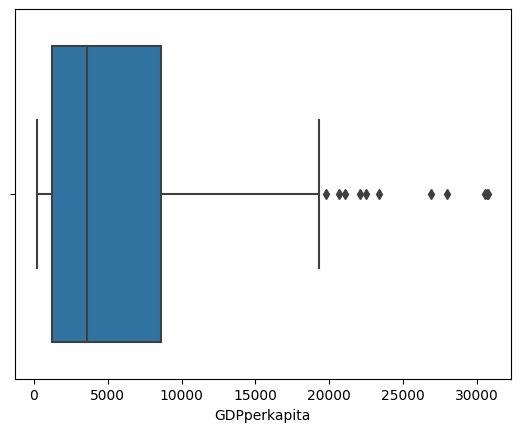

In [14]:
sns.boxplot(x='GDPperkapita', data=df2)
plt.show()

Hapus Outlier #2

In [15]:
df3 = hapus_outlier(df2[['Pendapatan', 'GDPperkapita']])

df3.dropna(axis=0, inplace=True)
df3

,Pendapatan,GDPperkapita
0,1610.0,553.0
1,9930.0,4090.0
2,12900.0,4460.0
3,5900.0,3530.0
4,19100.0,12200.0
...,...,...
162,2950.0,2970.0
163,16500.0,13500.0
164,4490.0,1310.0
165,4480.0,1310.0


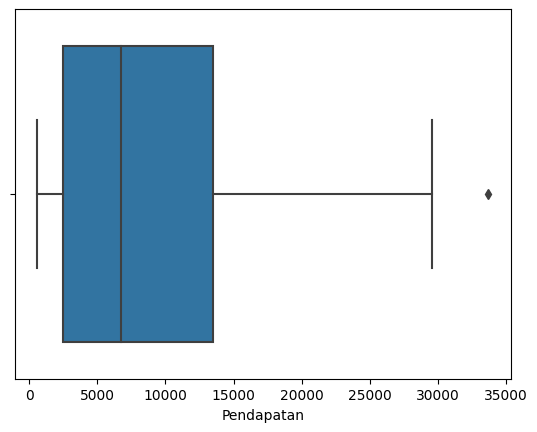

In [16]:
sns.boxplot(x='Pendapatan', data=df3)
plt.show()

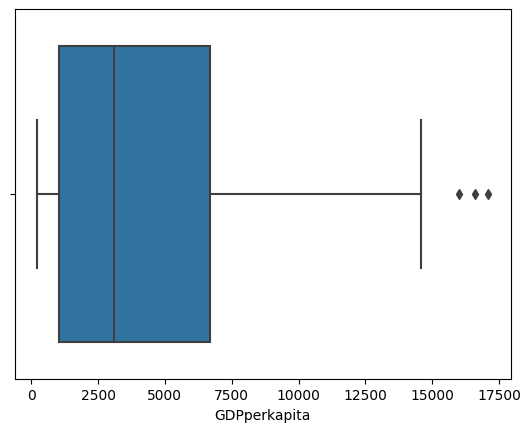

In [17]:
sns.boxplot(x='GDPperkapita', data=df3)
plt.show()

---



---

# EDA PART 2

# UNIVARIATE ANALYSIS

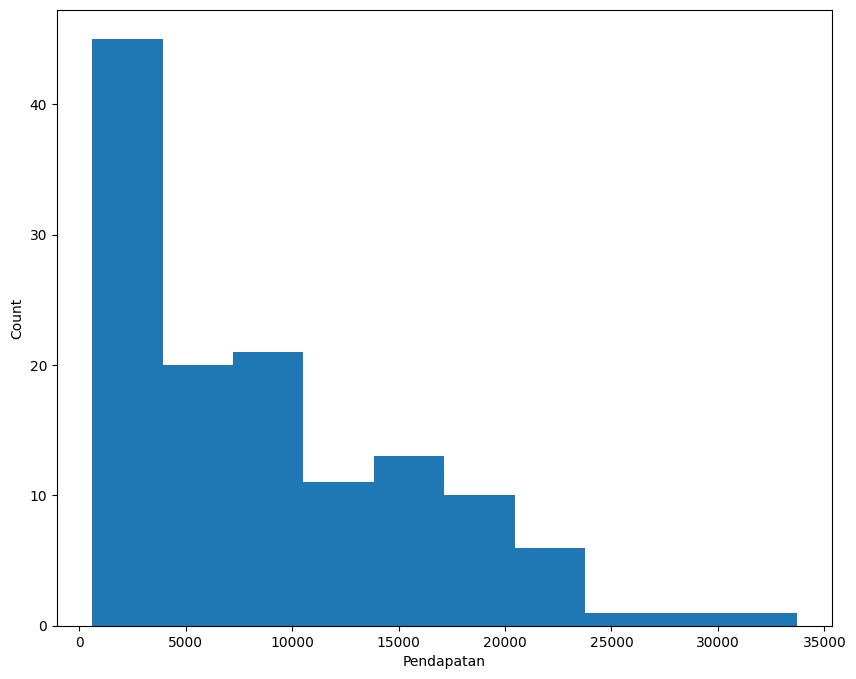

In [29]:
plt.figure(figsize=(10,8))
plt.hist(df3['Pendapatan'], bins=10)
plt.xlabel('Pendapatan')
plt.ylabel('Count')
plt.show()

Pendapatan paling banyak berada pada kisaran 1-4800

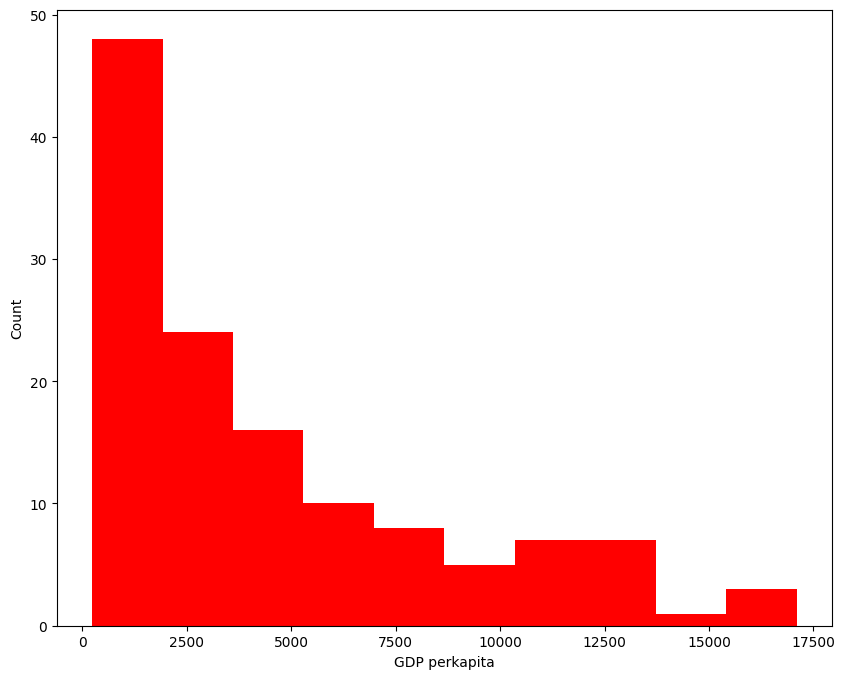

In [30]:
plt.figure(figsize=(10,8))
plt.hist(df3['GDPperkapita'], bins=10, color='red')
plt.xlabel('GDP perkapita')
plt.ylabel('Count')
plt.show()

GDP perkapita paling banyak berada pada kisaran 1-2300

# BIVARIATE ANALYSIS

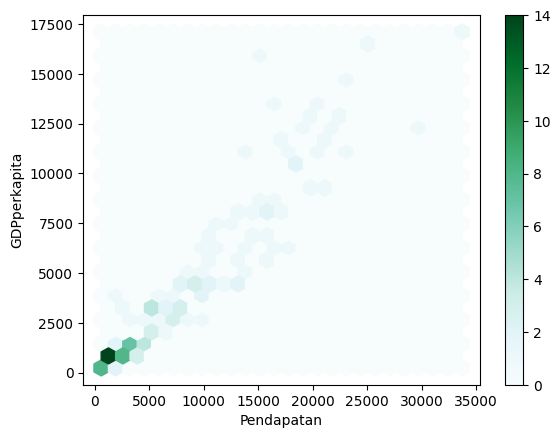

In [46]:
df3.plot.hexbin(x='Pendapatan', y='GDPperkapita', gridsize=25)
plt.show()

Negara paling banyak berada dengan nilai pendapatan yang berkisar 0-5000 dan nilai GDP perkapita yang berkisar 0-2500

---



---

# CLUSTERING

In [48]:
# Scaling Data
sc = StandardScaler()
df_std = sc.fit_transform(df3)
df_std

array([[-1.00340971e+00, -9.44550980e-01],
       [ 1.63532624e-01, -1.05881202e-01],
       [ 5.80097375e-01, -1.81492777e-02],
       [-4.01705067e-01, -2.38664656e-01],
       [ 1.44969382e+00,  1.81710774e+00],
       [ 1.39359083e+00,  1.36659245e+00],
       [-2.89499074e-01, -3.12169782e-01],
       [ 1.01489560e+00,  3.09067090e-01],
       [-8.86995988e-01, -8.95942751e-01],
       [ 9.16715355e-01,  2.71813832e+00],
       [ 1.04294710e+00,  3.54118619e-01],
       [-1.23995233e-01, -4.66028749e-02],
       [-9.73955633e-01, -8.95942751e-01],
       [-3.28771171e-01, -5.58767625e-01],
       [-4.70431238e-01, -6.06190287e-01],
       [ 1.34078551e-01,  1.74177188e-02],
       [ 6.36200371e-01,  4.29994878e-01],
       [ 8.04509361e-01,  1.57999443e+00],
       [ 9.16715355e-01,  5.46180400e-01],
       [-1.02865605e+00, -9.39334487e-01],
       [-1.12206754e+00, -1.02090147e+00],
       [-8.75775389e-01, -8.89303579e-01],
       [-8.56139340e-01, -7.65056204e-01],
       [-4.

# Cluster n = 2

In [50]:
# Dengan n cluster = 2
kmeans1 = KMeans(n_clusters = 2, init='k-means++', random_state=42)
kmeans1.fit(df_std)
labels1 = kmeans1.labels_
labels1

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [51]:
new_df = pd.DataFrame(data=df_std, columns=['Pendapatan', 'GDPperkapita'])
new_df['label1_kmeans'] = labels1

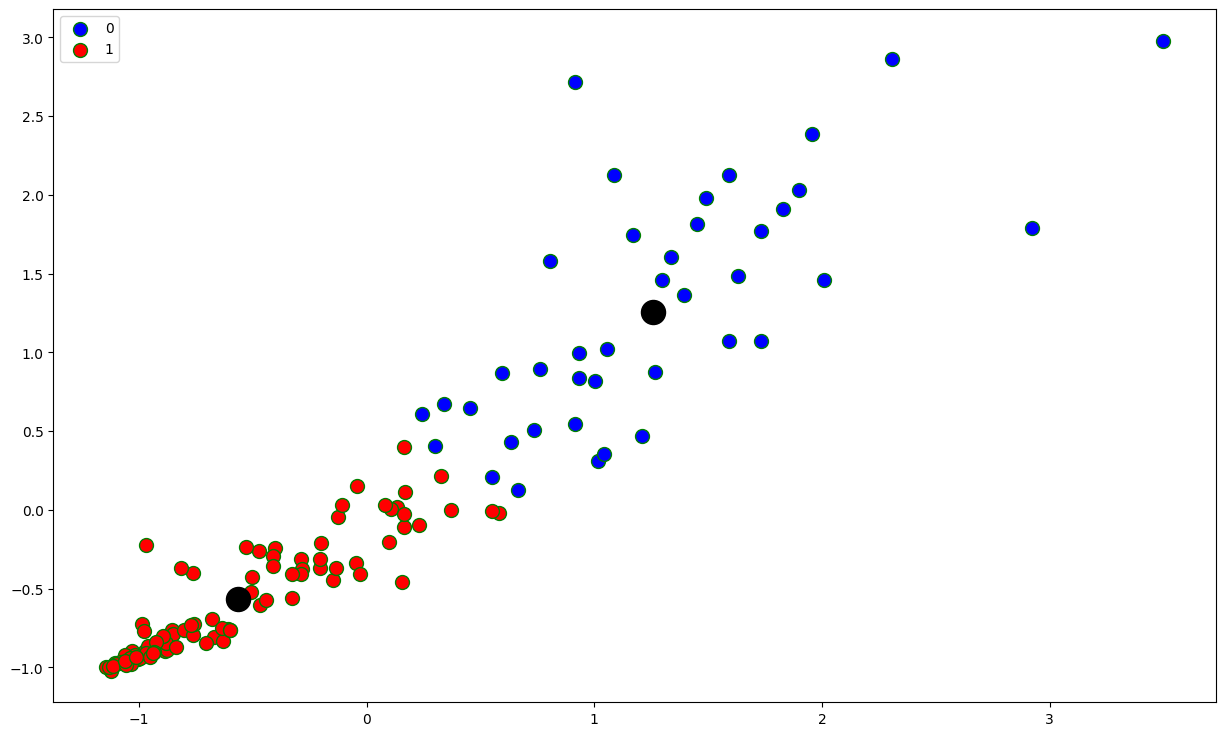

In [53]:
# Scatter Plot dengan n cluster = 2
plt.figure(figsize=(15,9))

plt.scatter(new_df['Pendapatan'][new_df.label1_kmeans==0], new_df['GDPperkapita'][new_df.label1_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label1_kmeans==1], new_df['GDPperkapita'][new_df.label1_kmeans==1], label='1', c='red', s=100, edgecolors='green')

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,0], c='k', s=300)
plt.legend()
plt.show()

# Elbow Method

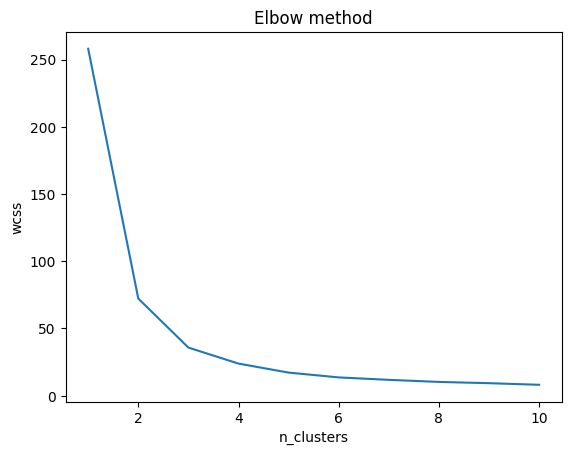

In [54]:
# Elbow method untuk menentukan n cluster yang cocok
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

Grafik elbow method merekomendasikan untuk n cluster = 3, maka akan dibuat scatter plot dengan n cluster = 3.

# Cluster n = 3

In [55]:
# Dengan n cluster = 3 
kmeans2 = KMeans(n_clusters = 3, init='k-means++', random_state=42)
kmeans2.fit(df_std)
labels2 = kmeans2.labels_
labels2

array([0, 2, 2, 0, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1,
       2, 0, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [57]:
new_df['label2_kmeans'] = labels2

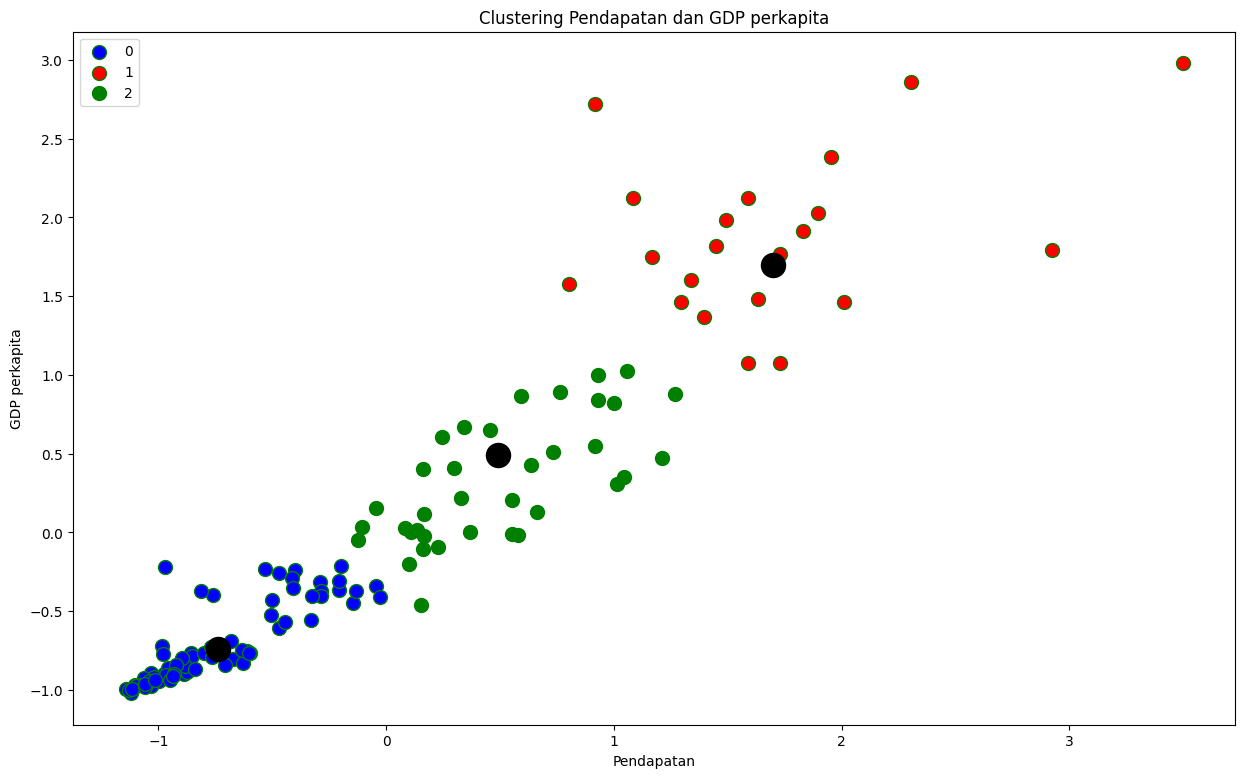

In [58]:
# Scatter Plot dengan n cluster = 3
plt.figure(figsize=(15,9))

plt.scatter(new_df['Pendapatan'][new_df.label2_kmeans==0], new_df['GDPperkapita'][new_df.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label2_kmeans==1], new_df['GDPperkapita'][new_df.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label2_kmeans==2], new_df['GDPperkapita'][new_df.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,0], c='k', s=300)
plt.xlabel('Pendapatan')
plt.ylabel('GDP perkapita')
plt.title('Clustering Pendapatan dan GDP perkapita')
plt.legend()
plt.show()

In [199]:
print(silhouette_score(df_std, labels= labels1)) # n cluster = 2
print(silhouette_score(df_std, labels= labels2)) # n cluster = 3

0.6379518757336385
0.5890258762560227


Meskipun silhouette score dari n cluster = 2 lebih besar daripada silhouette score n cluster = 3 tetapi scatter plot yang akan digunakan untuk proses selanjutnya adalah scatter plot dengan n cluster = 3 karena mengikuti grafik dari elbow method serta scatter plot n cluster = 3 lebih mudah untuk dianalisis.

---



---

# Invers Transform

Pada tahap selanjutnya akan digunakan metode invers transform untuk mengembalikan skala data ke bentuk representasi asli.

In [64]:
# Dengan n cluster = 3
kmeans3 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_std)
labels3 = kmeans3.labels_
labels3

array([0, 2, 2, 0, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1,
       2, 0, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [65]:
new_df1 = pd.DataFrame(data=sc.inverse_transform(df_std), columns=['Pendapatan', 'GDPperkapita'])
new_df1['label3_kmeans'] = labels3

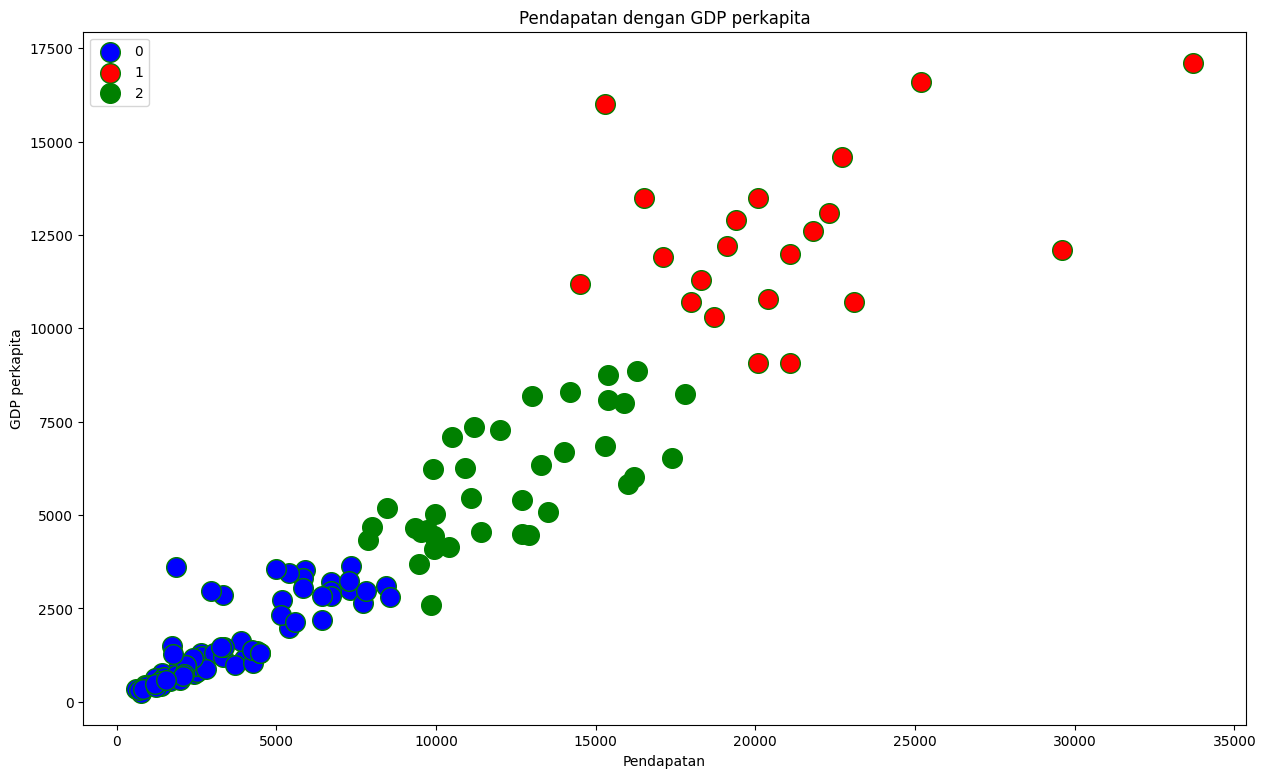

In [66]:
# Scatter Plot data inverse transform dengan n cluster = 3
plt.figure(figsize=(15,9))

plt.scatter(new_df1['Pendapatan'][new_df1.label3_kmeans==0], new_df1['GDPperkapita'][new_df1.label3_kmeans==0], label='0', c='blue', s=200, edgecolors='green')
plt.scatter(new_df1['Pendapatan'][new_df1.label3_kmeans==1], new_df1['GDPperkapita'][new_df1.label3_kmeans==1], label='1', c='red', s=200, edgecolors='green')
plt.scatter(new_df1['Pendapatan'][new_df1.label3_kmeans==2], new_df1['GDPperkapita'][new_df1.label3_kmeans==2], label='2', c='green', s=200, edgecolors='green')


plt.legend()
plt.title('Pendapatan dengan GDP perkapita')
plt.xlabel('Pendapatan')
plt.ylabel('GDP perkapita')
plt.show()

In [74]:
# Menampilkan data yang telah diberi label
df['label'] = pd.Series(labels3).astype('object')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,NaN
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,NaN
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,NaN
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,NaN


Dari data yang telah diberi label diatas akan diambil data dengan label 0 (label berwarna biru) karena pada laebl tersebut nilai Pendapatan dan nilai GDP perkapita berada pada posisi terendah dibanding label yang lainnya

In [75]:
find_negara = df[df['label']==0]  

Untuk mempermudah memperoleh negara yang menjadi fokus ceo, akan dilakukan sorting dan diambil 10 negara dengan nilai GDP perkapita terendah

In [76]:
find_negara.sort_values(by=['GDPperkapita'],ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,0
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547,0
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553,0
126,Rwanda,63.6,12.00,10.50,30.0,1350,2.61,64.6,4.51,563,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.81,57.9,5.87,575,0
109,Nepal,47.0,9.58,5.25,36.4,1990,15.10,68.3,2.61,592,0


Negara yang menjadi fokus ceo demi mendapatkan bantuan adalah Liberia, Niger, Central African Republic, Malawi, Eritra, Guinea-Bissau, Afghanistan, Rwanda, Burkina Faso, dan Nepal.

---



---